### Import Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data Preprocessing

#### Training image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 70295 files belonging to 38 classes.


### validation image preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 17572 files belonging to 38 classes.


In [5]:
#pirnt dataset
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[181.75 169.75 155.75]
   [181.5  169.5  155.5 ]
   [180.5  168.5  154.5 ]
   ...
   [193.   181.   169.  ]
   [183.75 171.75 159.75]
   [185.25 173.25 161.25]]

  [[185.25 173.25 159.25]
   [184.75 172.75 158.75]
   [178.5  166.5  152.5 ]
   ...
   [185.   173.   161.  ]
   [182.5  170.5  158.5 ]
   [183.   171.   159.  ]]

  [[179.75 167.75 153.75]
   [180.25 168.25 154.25]
   [179.75 167.75 153.75]
   ...
   [180.25 168.25 156.25]
   [182.   170.   158.  ]
   [178.   166.   154.  ]]

  ...

  [[150.   127.   113.  ]
   [140.75 117.75 103.75]
   [150.5  127.5  113.5 ]
   ...
   [135.   113.   102.  ]
   [122.25 100.25  89.25]
   [127.75 105.75  94.75]]

  [[141.   118.   104.  ]
   [130.5  107.5   93.5 ]
   [144.75 121.75 107.75]
   ...
   [132.25 110.25  99.25]
   [132.   110.    99.  ]
   [125.75 103.75  92.75]]

  [[127.   104.    90.  ]
   [140.   117.   103.  ]
   [133.25 110.25  96.25]
   ...
   [135.75 113.75 102.75]
   [147.5  125.5  114.5 ]
   [138.5  116.5  10

2024-04-27 08:12:10.549226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70295]
	 [[{{node Placeholder/_4}}]]
2024-04-27 08:12:10.549642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70295]
	 [[{{node Placeholder/_4}}]]
2024-04-27 08:12:10.588184: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
## Part 03: Convolutional Network

1. convolutional layer
    images are coverted into pixcels
    it take filter : scan i/p with dimentoins , scan image and extract important features in seperate matrix
    it reduces size of image
2. pooling
   max: Extract maximum value of view
   avg: avarage value extracting
3. Fully connected layer:
   convert data into 2D array and pass to n/w

In [6]:
## Building mode: 

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [9]:
# Building Convolutional Layer

In [8]:
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128, 128, 3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))


In [9]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))


In [10]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))


In [11]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))


In [12]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [13]:
model.add(Dropout(0.25))# to avoid overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units = 1500, activation = 'relu'))

In [18]:
## Output: 

In [16]:
model.add(Dense(units = 38, activation = 'softmax'))

In [17]:
model.add(Dropout(0.4))

In [21]:
## compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = 'accuracy')

## To avoide overshooting:
1. choose small learning rate: default = 0.001, we took: 0.0001(overfitting)
2. there may be chance of underfitting: increse no of nuron(under)
3. add more convolution layer to extract more featurefrom imgs(under)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [24]:
## 04

In [25]:
## Model Training: 

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - ETA: 0s - loss: 7.2150 - accuracy: 0.3592

2024-04-27 08:59:48.893935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]
2024-04-27 08:59:48.894334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [17572]
	 [[{{node Placeholder/_0}}]]


2197/2197 [==============================] - 3024s 1s/step - loss: 7.2150 - accuracy: 0.3592 - val_loss: 0.8027 - val_accuracy: 0.7438
Epoch 2/10
2197/2197 [==============================] - 3034s 1s/step - loss: 6.7513 - accuracy: 0.5063 - val_loss: 0.4920 - val_accuracy: 0.8384
Epoch 3/10
2197/2197 [==============================] - 3654s 2s/step - loss: 6.6157 - accuracy: 0.5407 - val_loss: 0.4303 - val_accuracy: 0.8603
Epoch 4/10
2197/2197 [==============================] - 5227s 2s/step - loss: 6.5610 - accuracy: 0.5578 - val_loss: 0.3461 - val_accuracy: 0.8916
Epoch 5/10
2197/2197 [==============================] - 3220s 1s/step - loss: 6.5409 - accuracy: 0.5652 - val_loss: 0.2910 - val_accuracy: 0.9050
Epoch 6/10
2197/2197 [==============================] - 3610s 2s/step - loss: 6.5769 - accuracy: 0.5675 - val_loss: 0.1847 - val_accuracy: 0.9396
Epoch 7/10
2197/2197 [==============================] - 3667s 2s/step - loss: 6.5629 - accuracy: 0.5722 - val_loss: 0.1847 - val_accura

In [21]:
## Training Done

## Model Evauation

## part 5

In [22]:
##MOdel evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 820s 373ms/step - loss: 0.1056 - accuracy: 0.9636


In [23]:
print(train_loss, train_acc)

0.10556218773126602 0.9635820388793945


In [24]:
##MOdel evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 202s 367ms/step - loss: 0.1877 - accuracy: 0.9394


In [25]:
print(val_loss, val_acc)

0.1876802146434784 0.9394491314888


## Save model

In [27]:
model.save("trained_model.h5")

In [29]:
model.save("trained_model.keras")

In [30]:
training_history.history

{'loss': [7.2149834632873535,
  6.751288414001465,
  6.615658283233643,
  6.560997486114502,
  6.540938377380371,
  6.576893329620361,
  6.5628662109375,
  6.489641189575195,
  6.504504680633545,
  6.527644157409668],
 'accuracy': [0.3592431843280792,
  0.5062522292137146,
  0.5406928062438965,
  0.5578348636627197,
  0.5651753544807434,
  0.5674514770507812,
  0.5722312927246094,
  0.5803542137145996,
  0.5803115367889404,
  0.5815918445587158],
 'val_loss': [0.8027381896972656,
  0.4920390546321869,
  0.43034714460372925,
  0.3460671007633209,
  0.2910486161708832,
  0.18471288681030273,
  0.18467332422733307,
  0.3033732771873474,
  0.16884978115558624,
  0.18768011033535004],
 'val_accuracy': [0.7437969446182251,
  0.8384361267089844,
  0.8603460192680359,
  0.8915888667106628,
  0.904962420463562,
  0.9395629167556763,
  0.9388800263404846,
  0.9050193428993225,
  0.9469610452651978,
  0.9394491314888]}

In [31]:
## Record History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [32]:
training_history.history["accuracy"]

[0.3592431843280792,
 0.5062522292137146,
 0.5406928062438965,
 0.5578348636627197,
 0.5651753544807434,
 0.5674514770507812,
 0.5722312927246094,
 0.5803542137145996,
 0.5803115367889404,
 0.5815918445587158]

In [33]:
training_history.history["val_accuracy"]

[0.7437969446182251,
 0.8384361267089844,
 0.8603460192680359,
 0.8915888667106628,
 0.904962420463562,
 0.9395629167556763,
 0.9388800263404846,
 0.9050193428993225,
 0.9469610452651978,
 0.9394491314888]

## Acuracy Visualization

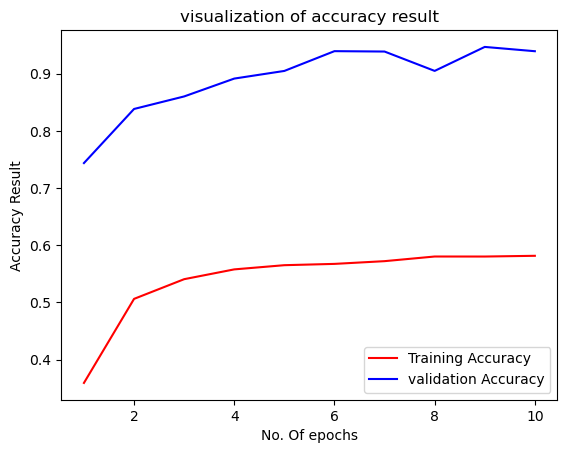

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history["accuracy"], color = "red", label = "Training Accuracy")
plt.plot(epochs, training_history.history["val_accuracy"], color = "blue", label = "validation Accuracy")
plt.xlabel("No. Of epochs")
plt.ylabel("Accuracy Result")
plt.title("visualization of accuracy result")
plt.legend()
plt.show()

## part 6

## Some other matrices for model evaluation

In [35]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

2024-04-27 18:50:54.892192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]
2024-04-27 18:50:54.892467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]


550/550 [==============================] - 202s 366ms/step


(array([[9.99993086e-01, 5.34819628e-06, 5.76875436e-10, ...,
         1.31544742e-14, 4.32676897e-16, 3.25850485e-13],
        [9.99989033e-01, 9.62624563e-06, 1.24780755e-08, ...,
         2.17572293e-12, 1.66889655e-13, 1.14635549e-11],
        [9.99983072e-01, 1.42646718e-06, 1.87228064e-08, ...,
         1.61489030e-12, 1.76076786e-12, 7.76036402e-10],
        ...,
        [8.08285350e-08, 1.04996188e-12, 6.87127297e-08, ...,
         2.84930357e-10, 5.50128450e-11, 9.99994874e-01],
        [1.02910883e-06, 6.17855116e-12, 1.50682681e-07, ...,
         3.53396885e-08, 1.07570630e-09, 9.99995351e-01],
        [4.56744225e-08, 5.56168375e-11, 3.09053183e-09, ...,
         6.41635456e-09, 3.20260801e-06, 9.90650654e-01]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred, axis = 1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [39]:
true_categories = tf.concat([y for x,y in test_set],axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories, axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

## Precision and recall

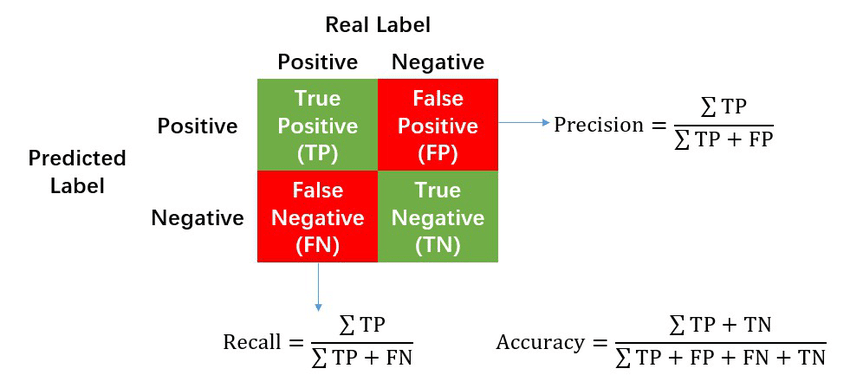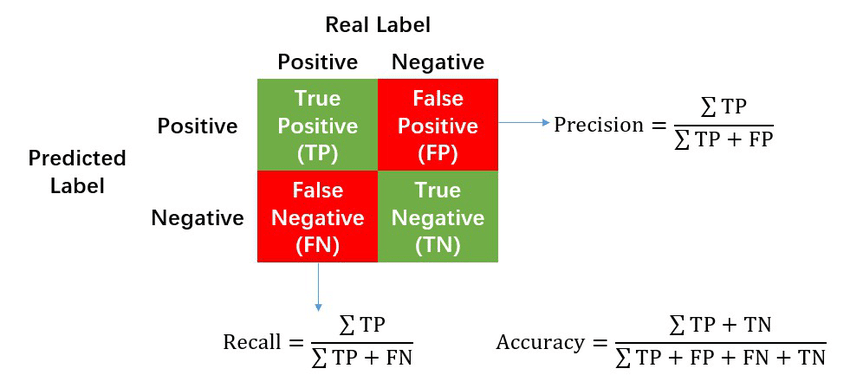

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(Y_true, predicted_categories, target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.85      0.96      0.90       504
                                 Apple___Black_rot       1.00      0.94      0.96       497
                          Apple___Cedar_apple_rust       0.92      0.97      0.95       440
                                   Apple___healthy       0.94      0.92      0.93       502
                               Blueberry___healthy       0.91      0.98      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.96      0.97       421
                 Cherry_(including_sour)___healthy       0.95      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.88      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

In [62]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[483,   0,   0, ...,   0,   0,   0],
       [ 16, 465,   0, ...,   0,   0,   0],
       [  0,   0, 427, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 440,   0],
       [  0,   0,   0, ...,   0,   0, 400]])

In [63]:
cm.shape

(38, 38)

### CM Visualization

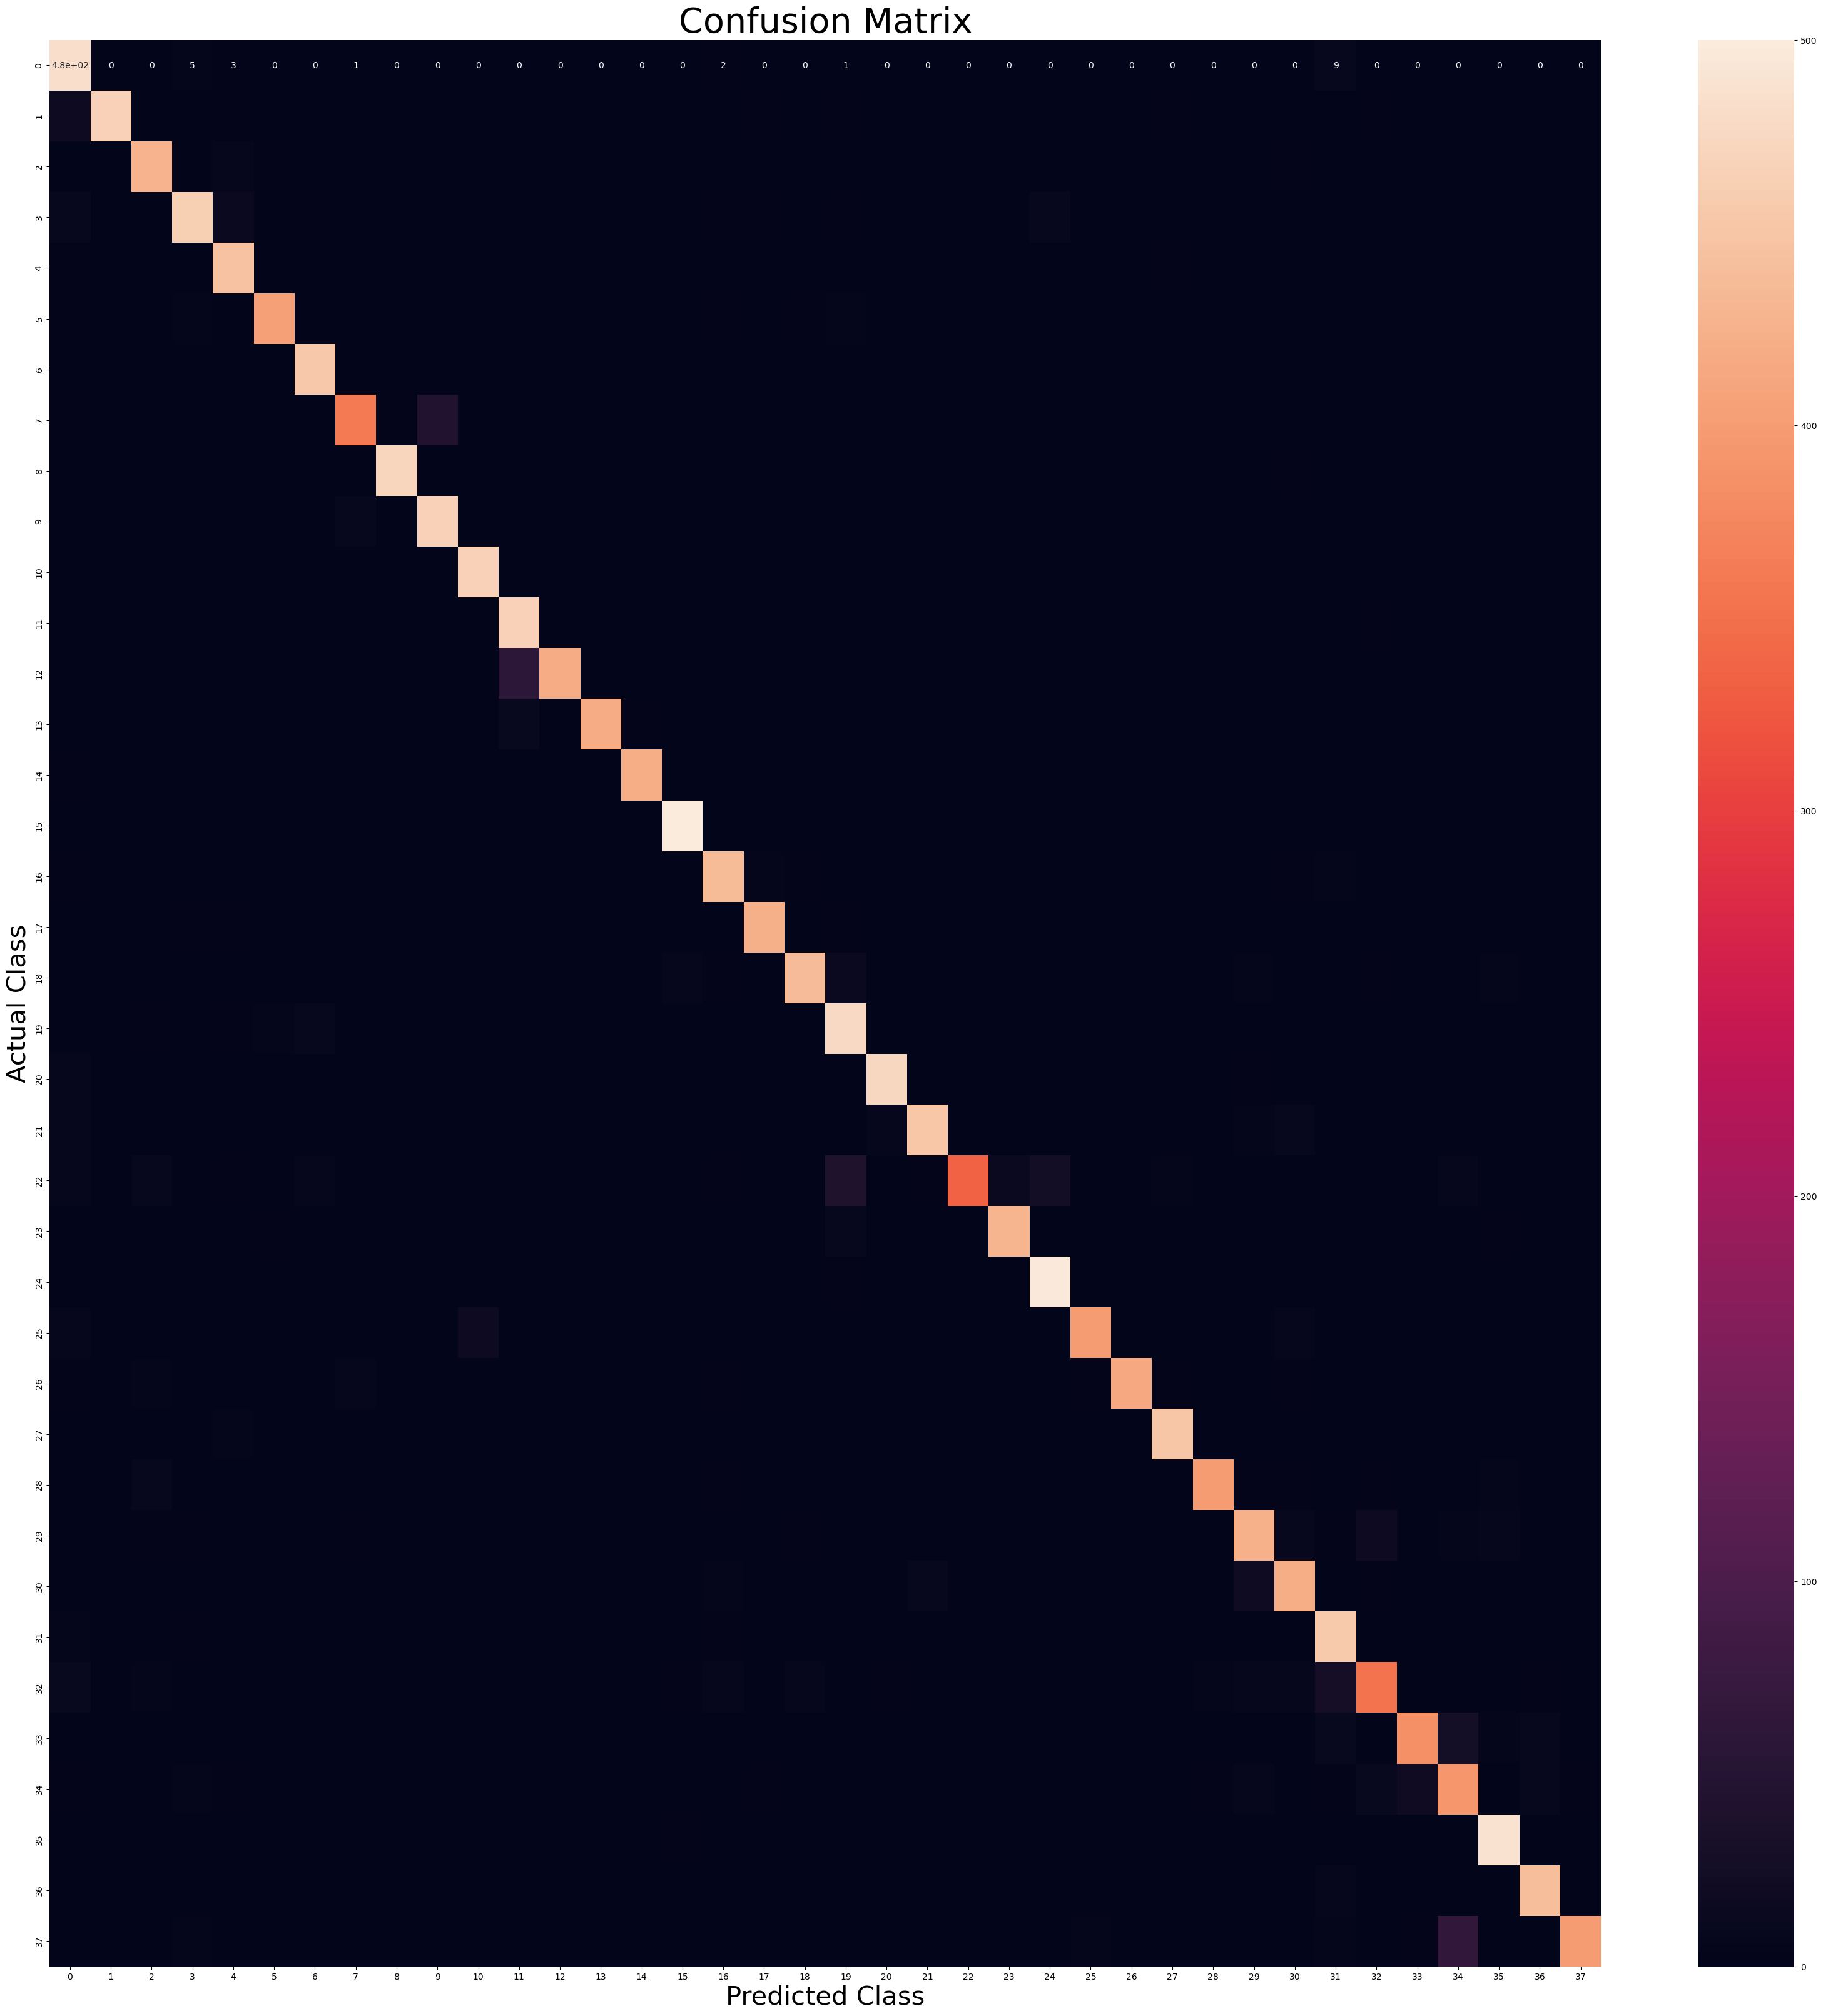

In [65]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=30)
plt.ylabel("Actual Class",fontsize=30)
plt.title("Confusion Matrix",fontsize=40)
plt.show()